## Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings("ignore")

### Loading the data

In [2]:
df=pd.read_csv(r'C:\Users\DELL\Desktop\Data_Science_practice github\Email_Scam_Classifire\spam_data.csv',encoding='latin')

## Performimg EDA on the data

In [3]:
df.head(3)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN


In [4]:
# Deleting non important columns
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],inplace=True)

In [5]:
df = df[['v2', 'v1']]  # Reordering the columns
df = df.rename(columns={'v2': 'message', 'v1': 'label'})  # Renaming the columns

In [6]:
df.head(2)

,message,label
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham


In [7]:
df.shape

(5572, 2)

In [8]:
df.info

<bound method DataFrame.info of                                                 message label
0     Go until jurong point, crazy.. Available only ...   ham
1                         Ok lar... Joking wif u oni...   ham
2     Free entry in 2 a wkly comp to win FA Cup fina...  spam
3     U dun say so early hor... U c already then say...   ham
4     Nah I don't think he goes to usf, he lives aro...   ham
...                                                 ...   ...
5567  This is the 2nd time we have tried 2 contact u...  spam
5568              Will Ì_ b going to esplanade fr home?   ham
5569  Pity, * was in mood for that. So...any other s...   ham
5570  The guy did some bitching but I acted like i'd...   ham
5571                         Rofl. Its true to its name   ham

[5572 rows x 2 columns]>

In [9]:
# Here in target columns ther are two values either ham or spam so we will label these either 1 or 0
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [10]:
df['label']=encoder.fit_transform(df['label'])
df.head(5)

,message,label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [11]:
# Now to check missing values
df.isnull().sum()

message    0
label      0
dtype: int64

In [12]:
# To check Duplicate value
df.duplicated().sum()

403

In [13]:
df1=df.drop_duplicates(keep='first')

In [14]:
df1.duplicated().sum()

0

In [15]:
df1.shape

(5169, 2)

In [16]:
df1.head(3)

,message,label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1


In [17]:
df1['label'].value_counts()

label
0    4516
1     653
Name: count, dtype: int64

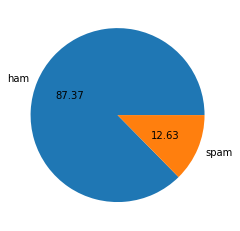

In [18]:
plt.pie(df1['label'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

#### From the above chart we can see we have imbalence data as we have appro.88% non-spam data and 12% spam msgs.

### Data preprocessing

In [19]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [20]:
# To count number of characters in the text message
df1['num_characters']=df1['message'].apply(len)

In [21]:
# To count number of words in the test message
df1['num_words']=df1['message'].apply(lambda x: len(nltk.word_tokenize(x)))

In [22]:
# To count number of sentences in the test message
df1['num_sentences']=df1['message'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [23]:
df1.head()

,message,label,num_characters,num_words,num_sentences
0,"Go until jurong point, crazy.. Available only ...",0,111,24,2
1,Ok lar... Joking wif u oni...,0,29,8,2
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37,2
3,U dun say so early hor... U c already then say...,0,49,13,1
4,"Nah I don't think he goes to usf, he lives aro...",0,61,15,1


In [24]:
df1[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [25]:
# we can see statistics for not spam and spam msg separately
# for not spam
df1[df1['label']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [26]:
# for spam
df1[df1['label']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


#### From the above information we can see the spam msgs are longer than non-spam msgs.

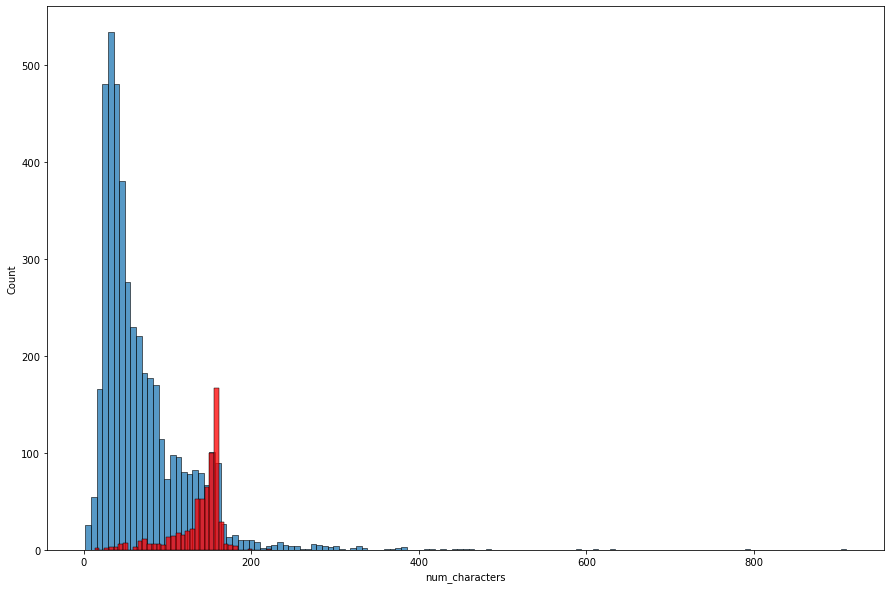

In [27]:
# We can see above by plotting
import seaborn as sns
plt.figure(figsize=(15,10))
sns.histplot(df1[df1.label==0]['num_characters'])
sns.histplot(df1[df1.label==1]['num_characters'],color='red')
plt.show()

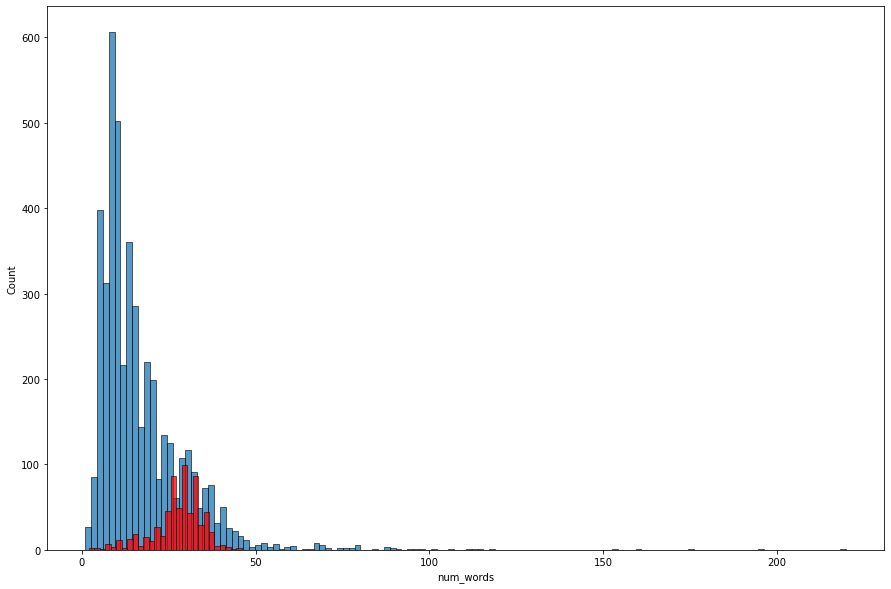

In [28]:
# We can see similar trend in no. of words also.
plt.figure(figsize=(15,10))
sns.histplot(df1[df1.label==0]['num_words'])
sns.histplot(df1[df1.label==1]['num_words'],color='red')
plt.show()

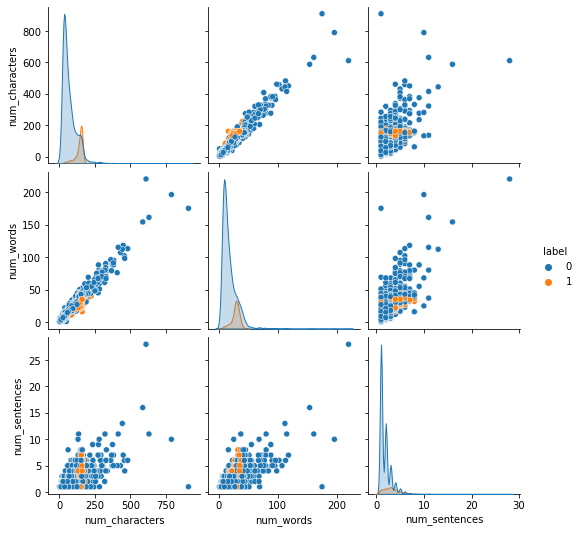

In [29]:
# We can see the relationship between the columns using pairplot
sns.pairplot(df1,hue='label')

In [30]:
# We can also check correlation 
df1.drop(columns=['message']).corr()

,label,num_characters,num_words,num_sentences
label,1.000000,0.384717,0.262984,0.284901
num_characters,0.384717,1.000000,0.965770,0.638143
num_words,0.262984,0.965770,1.000000,0.684541
num_sentences,0.284901,0.638143,0.684541,1.000000


<AxesSubplot:>

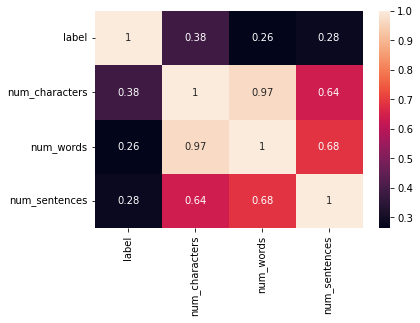

In [31]:
sns.heatmap(df1.drop(columns=['message']).corr(),annot=True)

#### From the heatmap we can clearly see that, there is highest correlation is beween number of characters and target so we will keep this for model  building rest two will not use.

## To perform data preprocessing

#### Now we are going to check the top words use in ham and scam msgs We are going to apply data preprocessing here
#### We will perform following operations on the data
#### 1.Lower case
#### 2.Tokenization
#### 3.Removing special Characters
#### 4.Removing stop words and punctuations
#### 5.Stemming

In [32]:
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
def transform_text(text):
    y=[]
    #converting text into lowercase
    text=text.lower()
    # Then tokenization would breakdown each sentence into words and retun a list with each word as element of list.
    text= nltk.word_tokenize(text)
    # removing special characters
    for i in text:
        if i.isalnum():
            y.append(i)
    # removing stopwords and punctuations
    text=y[:] # clonning the list 
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    # for stemming 
    text=y[:] # clonning the list
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [33]:
df1['transformed_text']=df1['message'].apply(transform_text)
df1.head(3)

,message,label,num_characters,num_words,num_sentences,transformed_text
0,"Go until jurong point, crazy.. Available only ...",0,111,24,2,go jurong point crazi avail bugi n great world...
1,Ok lar... Joking wif u oni...,0,29,8,2,ok lar joke wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...


#### Now we will generate word cloud separately for not span and spam to have an idea bout important words in each category

In [34]:
# For Spam
from wordcloud import WordCloud
wc= WordCloud(width=500,height=500,min_font_size=10,background_color='white')

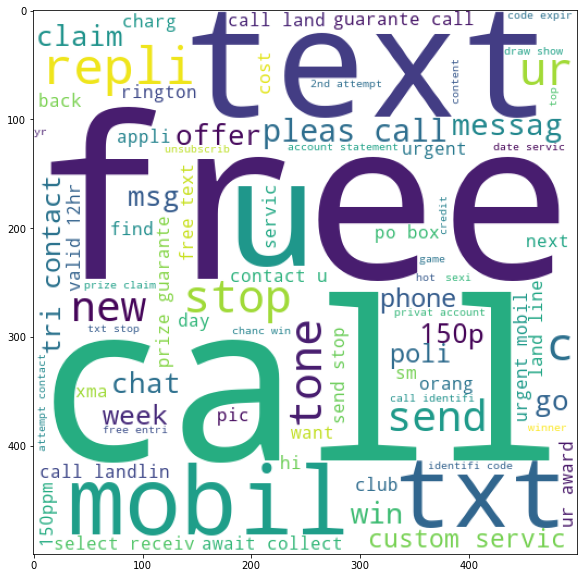

In [35]:
plt.figure(figsize=(15,10))
spam_wc=wc.generate(df1[df1['label']==1]['transformed_text'].str.cat(sep=" "))
plt.imshow(spam_wc)
plt.show()

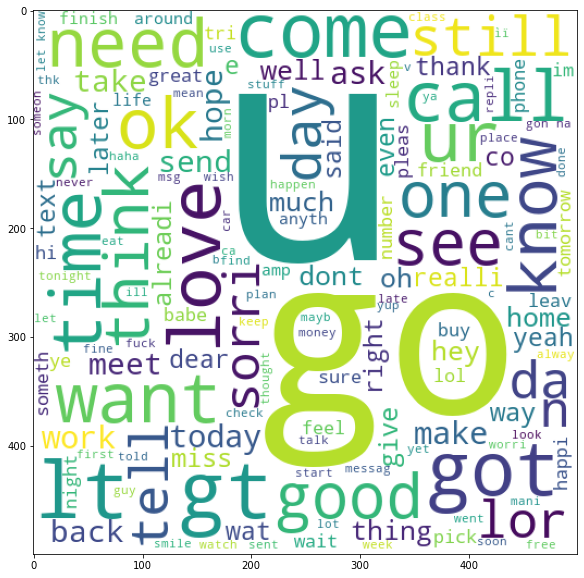

In [36]:
# For not spam
plt.figure(figsize=(15,10))
spam_wc=wc.generate(df1[df1['label']==0]['transformed_text'].str.cat(sep=" "))
plt.imshow(spam_wc)
plt.show()

In [37]:
df1.head()

,message,label,num_characters,num_words,num_sentences,transformed_text
0,"Go until jurong point, crazy.. Available only ...",0,111,24,2,go jurong point crazi avail bugi n great world...
1,Ok lar... Joking wif u oni...,0,29,8,2,ok lar joke wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,U dun say so early hor... U c already then say...,0,49,13,1,u dun say earli hor u c alreadi say
4,"Nah I don't think he goes to usf, he lives aro...",0,61,15,1,nah think goe usf live around though


In [38]:
# Now to find top 30 or 50  words used in not spam and spam messages
# for spam
spam_corpus=[]
for msg in df1[df1['label']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [39]:
len(spam_corpus)

9939

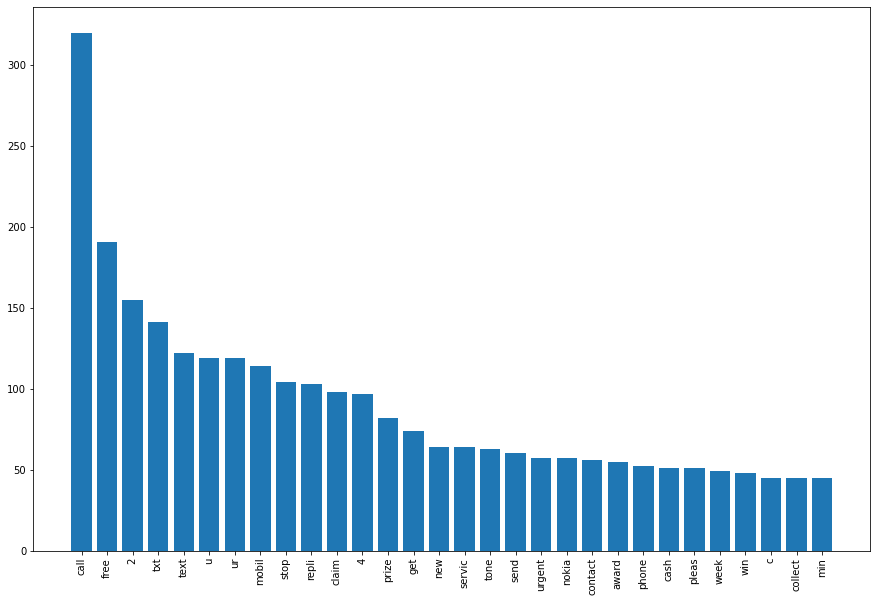

In [40]:
from collections import Counter
plt.figure(figsize=(15,10))
plt.bar(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [41]:
# for not spam
ham_corpus=[]
for msg in df1[df1['label']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [42]:
len(ham_corpus)

35394

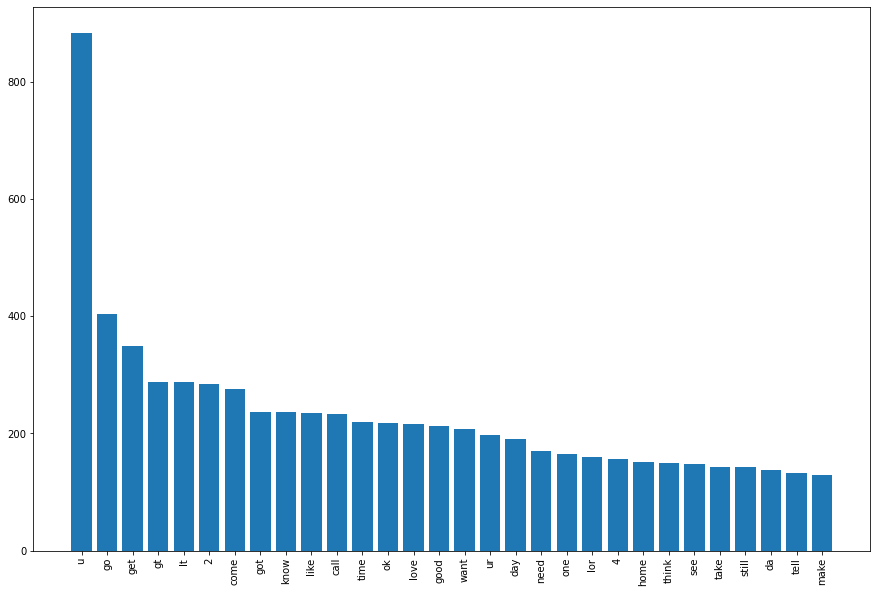

In [43]:
plt.figure(figsize=(15,10))
plt.bar(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [44]:
df1.head(3)

,message,label,num_characters,num_words,num_sentences,transformed_text
0,"Go until jurong point, crazy.. Available only ...",0,111,24,2,go jurong point crazi avail bugi n great world...
1,Ok lar... Joking wif u oni...,0,29,8,2,ok lar joke wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...


### Using countvectorizer

In [45]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [46]:
X=cv.fit_transform(df1['transformed_text']).toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [47]:
X.shape

(5169, 6708)

In [48]:
y=df1['label'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [49]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [50]:
# Now lets try other machine learning models (nearly all classification model we have tried below)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [51]:
#  We have made hyperparamete tunning of basic level on the basis of work experience and understanding
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [52]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [53]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    return accuracy,precision

In [54]:
train_classifier(svc,x_train,y_train,x_test,y_test)

(0.9284332688588007, 0.7580645161290323)

In [55]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items(): # We apply loop on created dictionary
    
    current_accuracy,current_precision = train_classifier(clf, x_train,y_train,x_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9284332688588007
Precision -  0.7580645161290323
For  KN
Accuracy -  0.90715667311412
Precision -  1.0
For  NB
Accuracy -  0.9642166344294004
Precision -  0.8344370860927153
For  DT
Accuracy -  0.9245647969052224
Precision -  0.9166666666666666
For  LR
Accuracy -  0.9709864603481625
Precision -  0.9736842105263158
For  RF
Accuracy -  0.971953578336557
Precision -  1.0
For  AdaBoost
Accuracy -  0.9632495164410058
Precision -  0.9464285714285714
For  BgC
Accuracy -  0.9622823984526112
Precision -  0.9159663865546218
For  ETC
Accuracy -  0.9777562862669246
Precision -  0.9914529914529915
For  GBDT
Accuracy -  0.9439071566731141
Precision -  0.9444444444444444
For  xgb
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406


In [56]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.907157,1.000000
5,RF,0.971954,1.000000
8,ETC,0.977756,0.991453
10,xgb,0.974855,0.974576
4,LR,0.970986,0.973684
6,AdaBoost,0.963250,0.946429
9,GBDT,0.943907,0.944444
3,DT,0.924565,0.916667
7,BgC,0.962282,0.915966
2,NB,0.964217,0.834437


### Using TFIDF vectorizer

In [57]:
# From the above 3 we can see Bernoulli performing well for the given data.
# Now lets try the above using TF-IDF
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
tfidf=TfidfVectorizer()

In [58]:
X=tfidf.fit_transform(df1['transformed_text']).toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [59]:
y=df1['label'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [60]:
#  We have made hyperparamete tunning of basic level on the basis of work experience and understanding
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [61]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [62]:
def train_classifier(clf,_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [63]:
train_classifier(svc,x_train,y_train,x_test,y_test)

(0.9284332688588007, 0.7580645161290323)

In [64]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items(): # We apply loop on created dictionary
    
    current_accuracy,current_precision = train_classifier(clf, x_train,y_train,x_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9284332688588007
Precision -  0.7580645161290323
For  KN
Accuracy -  0.90715667311412
Precision -  1.0
For  NB
Accuracy -  0.9642166344294004
Precision -  0.8344370860927153
For  DT
Accuracy -  0.9264990328820116
Precision -  0.9428571428571428
For  LR
Accuracy -  0.9709864603481625
Precision -  0.9736842105263158
For  RF
Accuracy -  0.971953578336557
Precision -  1.0
For  AdaBoost
Accuracy -  0.9632495164410058
Precision -  0.9464285714285714
For  BgC
Accuracy -  0.9622823984526112
Precision -  0.9159663865546218
For  ETC
Accuracy -  0.9777562862669246
Precision -  0.9914529914529915
For  GBDT
Accuracy -  0.9439071566731141
Precision -  0.9444444444444444
For  xgb
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406


In [65]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.907157,1.000000
5,RF,0.971954,1.000000
8,ETC,0.977756,0.991453
10,xgb,0.974855,0.974576
4,LR,0.970986,0.973684
6,AdaBoost,0.963250,0.946429
9,GBDT,0.943907,0.944444
3,DT,0.926499,0.942857
7,BgC,0.962282,0.915966
2,NB,0.964217,0.834437


####  We will continue with random forest and fit final model to data with use tfidf vectorizer

In [66]:
# This is our final set up before exporting model to pickle file we don't need to 
# write it separately we can make adjustment in above but this is just for understanding
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
from sklearn.model_selection import train_test_split
tfidffinal=TfidfVectorizer()
X=tfidffinal.fit_transform(df1['transformed_text']).toarray()
y=df1['label'].values
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)
rfc.fit(x_train,y_train)
y_pred2=rfc.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9738878143133463
[[896   0]
 [ 27 111]]
1.0


### Creating pickle files for web application

In [67]:
import pickle
pickle.dump(tfidffinal,open('vectorizer.pkl','wb'))
pickle.dump(rfc,open('model.pkl','wb'))